In [7]:
# 1. import libraries

In [8]:
# To read data and tooperation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
from sklearn.model_selection import train_test_split, GridSearchCV

# object to nmerical 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# metric to check evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# to convert into files
import pickle
import json

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# 2. Load Data 

In [10]:
#  read data by using pandas read_csv function
df = pd.read_csv(r"C:\Users\INTEL\Downloads\healthcare_claims_large.csv")
df.head(3)

,Claim_ID,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,C00001,72,Male,P003,D002,PR003,30785,3732,RJ,Basic,Approved
1,C00002,78,Male,P002,D005,PR005,23057,4942,AP,Standard,Approved
2,C00003,66,Female,P005,D003,PR002,43002,61853,DL,Standard,Approved


In [12]:
# 3. Exploratory data analysis(EDA)

In [13]:
#  check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Claim_ID          5000 non-null   object
 1   Patient_Age       5000 non-null   int64 
 2   Gender            5000 non-null   object
 3   Provider          5000 non-null   object
 4   Diagnosis         5000 non-null   object
 5   Procedure         5000 non-null   object
 6   Claim_Amount      5000 non-null   int64 
 7   Hospital_Charges  5000 non-null   int64 
 8   State             5000 non-null   object
 9   Policy_Type       5000 non-null   object
 10  Claim_Status      5000 non-null   object
dtypes: int64(3), object(8)
memory usage: 429.8+ KB


In [14]:
# summary statistics
df.describe()

""" age : 
         1. mean - 53
         2. min  - 18
         3. max  - 89
"""

' age : \n         1. mean - 53\n         2. min  - 18\n         3. max  - 89\n'

In [15]:
#  count of missing values
df.isnull().sum()

Claim_ID            0
Patient_Age         0
Gender              0
Provider            0
Diagnosis           0
Procedure           0
Claim_Amount        0
Hospital_Charges    0
State               0
Policy_Type         0
Claim_Status        0
dtype: int64

In [16]:
#  check duplicate entries (rows) 
df.duplicated().sum()

#  drop duplicate 
df.drop_duplicates(inplace = True)


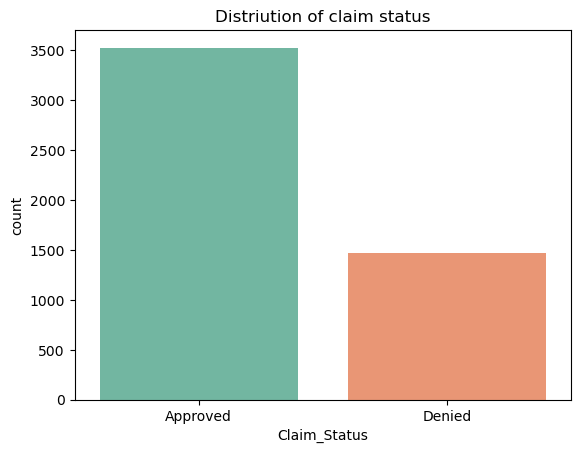

In [17]:
# check target variable distrbution
#  classification problems  means target in categorical var (countplot)

"""base on this visualization we understand our data is imbalance 
  1. we want to balance this data set"""

sns.countplot(x= df['Claim_Status'], palette = 'Set2')
plt.title("Distriution of claim status")
plt.show()

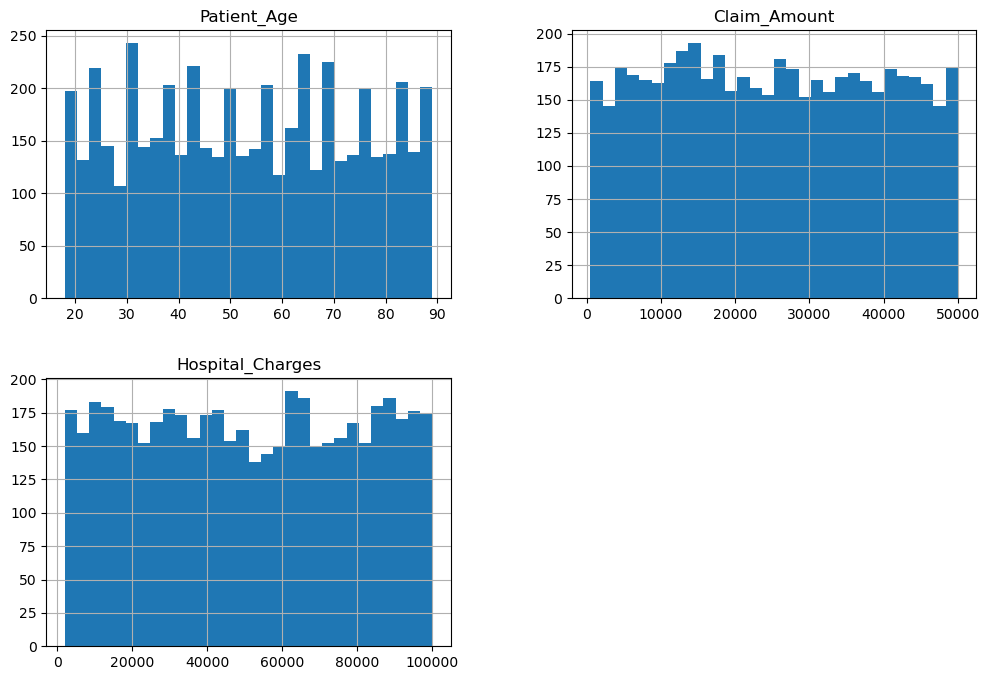

In [18]:
# features distribution
# plot on only continous columns

df.hist(figsize = (12,8) , bins = 30)
plt.show()

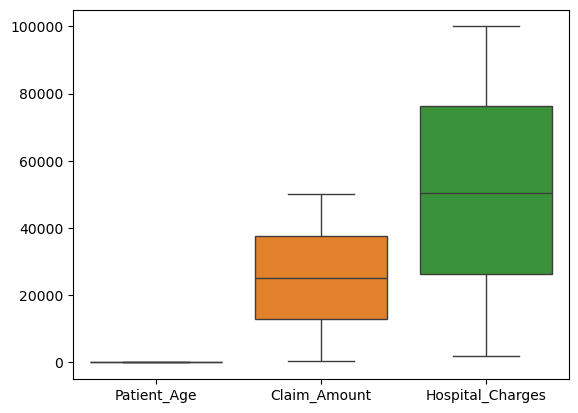

In [19]:
#  Box plot for outlier detection

sns.boxplot(data= df)
plt.show()

In [20]:
# correlation heatmap
# for correlation matrix we want column is numeric

In [21]:
df.head()

,Claim_ID,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,C00001,72,Male,P003,D002,PR003,30785,3732,RJ,Basic,Approved
1,C00002,78,Male,P002,D005,PR005,23057,4942,AP,Standard,Approved
2,C00003,66,Female,P005,D003,PR002,43002,61853,DL,Standard,Approved
3,C00004,69,Female,P004,D002,PR004,14719,99084,GJ,Standard,Approved
4,C00005,19,Female,P001,D001,PR004,44506,11429,UP,Premium,Approved


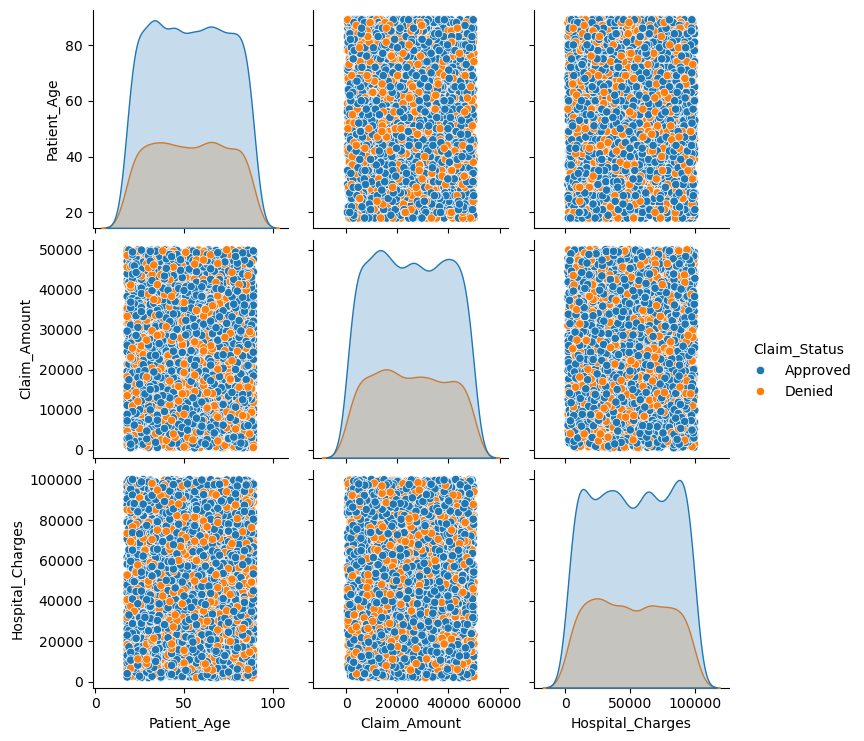

In [22]:
# pairplot for relational analysis 
# with target columns()
# hue  - we plot base on target column
sns.pairplot(df,hue = "Claim_Status", diag_kind = "kde")
plt.show()

In [23]:
#  check skewness
# df.skew()

In [25]:
# 4. Feature Engineering

In [26]:
df.head(1)

,Claim_ID,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,C00001,72,Male,P003,D002,PR003,30785,3732,RJ,Basic,Approved


In [27]:
df['Provider'].value_counts()
df['Diagnosis'].value_counts()
df['Procedure'].value_counts()
df['State'].value_counts()  # AP -

State
AP    551
TN    517
WB    516
GJ    504
DL    502
KA    500
RJ    491
UP    488
MH    469
MP    462
Name: count, dtype: int64

In [28]:
# Encode categorical variable
# first we convert only labels data

# syntax
# variable = le.fit_transform(df[columns])
le = LabelEncoder()

categorical_columns = ["Provider","Diagnosis","Procedure","State"]

for i in categorical_columns:
    df[i]=le.fit_transform(df[i])

In [29]:
df.head(3)

,Claim_ID,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,C00001,72,Male,2,1,2,30785,3732,6,Basic,Approved
1,C00002,78,Male,1,4,4,23057,4942,0,Standard,Approved
2,C00003,66,Female,4,2,1,43002,61853,1,Standard,Approved


In [30]:
# Convert Target and gender column to binary
df["Gender"].value_counts()
df["Claim_Status"].value_counts()

Claim_Status
Approved    3528
Denied      1472
Name: count, dtype: int64

In [31]:
# convert target columns
df["Claim_Status"] = df["Claim_Status"].map({"Approved":1,"Denied":0})

# convert gender columns
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})

In [32]:
df.head()

,Claim_ID,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,C00001,72,1,2,1,2,30785,3732,6,Basic,1
1,C00002,78,1,1,4,4,23057,4942,0,Standard,1
2,C00003,66,0,4,2,1,43002,61853,1,Standard,1
3,C00004,69,0,3,1,3,14719,99084,2,Standard,1
4,C00005,19,0,0,0,3,44506,11429,8,Premium,1


In [33]:
# df["Policy_Type"].value_counts()


# also convert policy type columns
df["Policy_Type"] = le.fit_transform(df["Policy_Type"])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Claim_ID          5000 non-null   object
 1   Patient_Age       5000 non-null   int64 
 2   Gender            5000 non-null   int64 
 3   Provider          5000 non-null   int32 
 4   Diagnosis         5000 non-null   int32 
 5   Procedure         5000 non-null   int32 
 6   Claim_Amount      5000 non-null   int64 
 7   Hospital_Charges  5000 non-null   int64 
 8   State             5000 non-null   int32 
 9   Policy_Type       5000 non-null   int32 
 10  Claim_Status      5000 non-null   int64 
dtypes: int32(5), int64(5), object(1)
memory usage: 332.2+ KB


In [36]:
# Why drop Claim_ID
# It does not contribute to predicting claim denial 
# Keeping it may add noise to the model
# Machine learning models do not need unique identifier

In [37]:
df.drop("Claim_ID",axis = 1,inplace = True)

In [38]:
df.head(1)

,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,72,1,2,1,2,30785,3732,6,0,1


In [39]:
# Standardize Numerical feature

scaler =StandardScaler()
numeric_feature = ["Patient_Age","Claim_Amount","Hospital_Charges"]
df[numeric_feature] = scaler.fit_transform(df[numeric_feature])

In [40]:
df.head(1)

,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,0.901239,1,2,1,2,0.401964,-1.64671,6,0,1


In [41]:
#@ our data is imbalance so we applying SMOTE technique to balance data

# 1. Random oversampling
# 2. Random undersampling
# 3. SMOTE (synthetic minority oversampling technique)

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
#  seperate feature and target 

x= df.drop("Claim_Status",axis=1)
y= df["Claim_Status"]

In [44]:
# apply smote to balance classes

smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x,y)

In [45]:
# convert in dataframe
df1 = pd.DataFrame(x_resampled, columns = x.columns)
df1["target"] = y_resampled

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient_Age       7056 non-null   float64
 1   Gender            7056 non-null   int64  
 2   Provider          7056 non-null   int32  
 3   Diagnosis         7056 non-null   int32  
 4   Procedure         7056 non-null   int32  
 5   Claim_Amount      7056 non-null   float64
 6   Hospital_Charges  7056 non-null   float64
 7   State             7056 non-null   int32  
 8   Policy_Type       7056 non-null   int32  
 9   target            7056 non-null   int64  
dtypes: float64(3), int32(5), int64(2)
memory usage: 413.6 KB


In [47]:
# check target variable distribution after balance

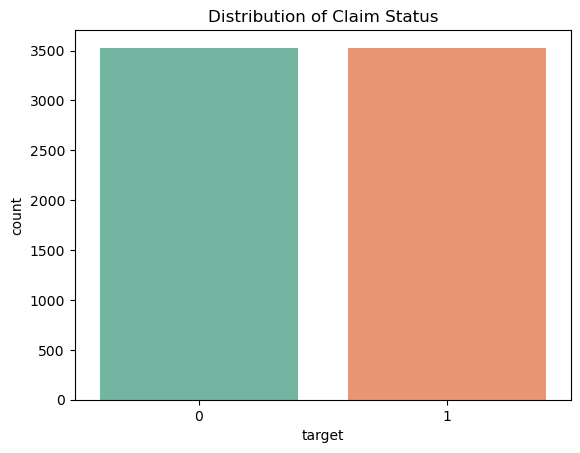

In [48]:
sns.countplot(x=df1["target"],palette="Set2")
plt.title("Distribution of Claim Status")
plt.show()

In [49]:
# 1. Classification or regression
# 2. high dimension(more columns) sum , naive byes
# 3. low dimensions(logi., random, knn, decision)

In [50]:
# Step 6. split data for training & testing

In [51]:
# df1

x= df1.drop("target",axis=1)
y= df1["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=42)

In [52]:
x_train

,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type
5981,-0.795677,0,1,0,0,-0.991112,-0.639770,3,1
4222,-0.888085,0,0,2,3,1.247917,-1.071233,7,2
1729,0.756158,1,4,1,4,0.911477,-1.427552,3,0
3907,1.239759,0,4,0,2,-0.830149,0.795884,7,1
4209,-0.259404,1,0,1,1,0.566668,1.046201,9,2
...,...,...,...,...,...,...,...,...,...
3772,-0.743004,0,1,0,4,0.931661,-1.125246,7,1
5191,-0.819720,0,3,3,0,1.695628,-0.052737,2,1
5226,1.388003,0,1,1,3,-0.689141,0.080338,2,1
5390,0.435990,0,3,4,3,-0.452070,1.193233,8,1


# Step 7. Train Multiple ML Models

In [53]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [54]:
#  Evauation on testing data
y_pred_test = log_model.predict(x_test)

accuracy_test = accuracy_score(y_pred_test,y_test)
print(f"accuracy of testing data:" ,accuracy_test)


# Evaluation on training dataset
y_pred_train = log_model.predict(x_train)

accuracy_train = accuracy_score(y_pred_train,y_train)
print(f"accuracy of training data:",accuracy_train)

accuracy of testing data: 0.546742209631728
accuracy of training data: 0.5442948263642806


In [55]:
# random forest

In [56]:
rf_model= RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
# evaluation on testing data
y_pred_test = rf_model.predict(x_test)

accuracy_test = accuracy_score(y_pred_test,y_test)
print(f"accuracy of testing data:" ,accuracy_test)


# Evaluation on training dataset
y_pred_train = rf_model.predict(x_train)

accuracy_train = accuracy_score(y_pred_train,y_train)
print(f"accuracy of training data:",accuracy_train)

accuracy of testing data: 0.7160056657223796
accuracy of training data: 1.0


In [59]:
# by using random forest model we get best accuracy but 
# our model is overfitted
# overfitted - best accuracy on training data
             # - bad accuracy on testing data

# accuracy of testing data: 0.7039660056657224
# accuracy of training data: 1.0

In [61]:
# step8 : Hyperparameter tunning (GridSearchCV)

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
rf_model = RandomForestClassifier()

para = {"criterion":["gini","entropy"],
        "max_depth":np.arange(3,20),
        "min_samples_split":np.arange(3,20),
        "min_samples_leaf":np.arange(2,10),
         "n_estimators":np.arange(50,150)}

random_search = RandomizedSearchCV(rf_model, para, cv=5)
random_search.fit(x_train,y_train)
best_model = random_search.best_estimator_

In [64]:
best_model

RandomForestClassifier(max_depth=17, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=99)

In [65]:
# evaluation on testing
y_pred_test = best_model.predict(x_test)

accuracy_test = accuracy_score(y_pred_test,y_test)
print(f"testing accuracy after hyp:" ,accuracy_test)


# Evaluation on training dataset
y_pred_train = best_model.predict(x_train)

accuracy_train = accuracy_score(y_pred_train,y_train)
print(f"training accuracy after hyp:",accuracy_train)

testing accuracy after hyp: 0.6713881019830028
training accuracy after hyp: 0.9549964564138909


In [66]:
# support vector machine

In [67]:
from sklearn.svm import SVC

In [68]:
# model training
svm_model = SVC(kernel = "linear")
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [69]:
# evaluation on testing data
y_pred_test = svm_model.predict(x_test)

accuracy_test = accuracy_score(y_pred_test,y_test)
print(f"accuracy of testing data:" ,accuracy_test)


# Evaluation on training dataset
y_pred_train = svm_model.predict(x_train)

accuracy_train = accuracy_score(y_pred_train,y_train)
print(f"accuracy of training data:",accuracy_train)

accuracy of testing data: 0.5410764872521246
accuracy of training data: 0.5412827781715096


In [70]:
# K nearest neighbours

In [71]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
# evaluation on testing data
y_pred_test = knn_model.predict(x_test)

accuracy_test = accuracy_score(y_pred_test,y_test)
print(f"accuracy of testing data:" ,accuracy_test)


# Evaluation on training dataset
y_pred_train = knn_model.predict(x_train)

accuracy_train = accuracy_score(y_pred_train,y_train)
print(f"accuracy of training data:",accuracy_train)

accuracy of testing data: 0.6919263456090652
accuracy of training data: 0.8031537916371367


# step 9: save model as pickle & json

save the model in pickle 


In [73]:
with open("model.pkl","wb") as f:
    pickle.dump(best_model,f)

#### save model parameter 

In [74]:
model_json  = {"max_depth":19, "min_samples_leaf":3, "min_samples_split":10, "n_estimators":127}

with open("model_config.json","w")as f:
    json.dump(model_json,f)

In [75]:
import json

In [76]:
with open("model_config.json","r") as f:
    data = json.load(f)

print(data)

{'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 127}
